# Exploring SpaceX Data via API 

This Jupyter Notebook explores data from the SpaceX API, extracting information about rockets, launch pads, past launches, upcoming launches, payloads, capsules, and more

### Fetching Data:
- Data was obtained from various endpoints of the SpaceX API without requiring an API key.
- Retrieved information includes details about rockets, launch pads, past and upcoming launches, payloads, and capsules.

In [16]:
# Importing libraries
import requests
import pandas as pd
import seaborn as sns

### Access SpaceX API

In [3]:
# SpaceX API endpoint for past launches
endpoint = 'https://api.spacexdata.com/v4/launches/past'

# Make a GET request to fetch the data
response = requests.get(endpoint)

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    spacex_data = response.json()  # Get the JSON data
    print("Data fetched successfully.")
else:
    print("Failed to fetch data.")

Data fetched successfully.


### Access Rockets Data

In [5]:
def get_rockets():
    endpoint = 'https://api.spacexdata.com/v4/rockets'
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch rockets data.")
        return None

# Fetch rockets data
rockets_data = get_rockets()

### Launch Pads Data

In [6]:
def get_launch_pads():
    endpoint = 'https://api.spacexdata.com/v4/launchpads'
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch launch pads data.")
        return None

# Fetch launch pads data
launch_pads_data = get_launch_pads()

### Upcoming Launches Data

In [7]:
def get_upcoming_launches():
    endpoint = 'https://api.spacexdata.com/v4/launches/upcoming'
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch upcoming launches.")
        return None

# Fetch upcoming launches data
upcoming_launches_data = get_upcoming_launches()

###  Access Past Launches Data

In [8]:
def get_past_launches():
    endpoint = 'https://api.spacexdata.com/v4/launches/past'
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch past launches.")
        return None

past_launches_data = get_past_launches()

###  Payloads Data

In [9]:
def get_payloads():
    endpoint = 'https://api.spacexdata.com/v4/payloads'
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch payloads data.")
        return None

# Fetch payloads data
payloads_data = get_payloads()

### Convert Data to DataFrames

In [10]:
# Convert fetched data into DataFrames using pd.DataFrame
df_rockets = pd.DataFrame(rockets_data)
df_launchpads = pd.DataFrame(launch_pads_data)
df_upcoming_launches = pd.DataFrame(upcoming_launches_data)
df_past_launches = pd.DataFrame(past_launches_data)
df_payloads = pd.DataFrame(payloads_data)

###  Saving DataFrames to CSV files

In [11]:
df_rockets.to_csv('rockets.csv', index=False)
df_launchpads.to_csv('launchpads.csv', index=False)
df_upcoming_launches.to_csv('upcoming_launches.csv', index=False)
df_past_launches.to_csv('past_launches.csv', index=False)
df_payloads.to_csv('payloads.csv', index=False)

### Exploring Data

In [11]:
df_rockets.head()

,height,diameter,mass,first_stage,second_stage,engines,landing_legs,payload_weights,flickr_images,name,...,stages,boosters,cost_per_launch,success_rate_pct,first_flight,country,company,wikipedia,description,id
0,"{'meters': 22.25, 'feet': 73}","{'meters': 1.68, 'feet': 5.5}","{'kg': 30146, 'lb': 66460}","{'thrust_sea_level': {'kN': 420, 'lbf': 94000}...","{'thrust': {'kN': 31, 'lbf': 7000}, 'payloads'...","{'isp': {'sea_level': 267, 'vacuum': 304}, 'th...","{'number': 0, 'material': None}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...","[https://imgur.com/DaCfMsj.jpg, https://imgur....",Falcon 1,...,2,0,6700000,40,2006-03-24,Republic of the Marshall Islands,SpaceX,https://en.wikipedia.org/wiki/Falcon_1,The Falcon 1 was an expendable launch system p...,5e9d0d95eda69955f709d1eb
1,"{'meters': 70, 'feet': 229.6}","{'meters': 3.7, 'feet': 12}","{'kg': 549054, 'lb': 1207920}","{'thrust_sea_level': {'kN': 7607, 'lbf': 17100...","{'thrust': {'kN': 934, 'lbf': 210000}, 'payloa...","{'isp': {'sea_level': 288, 'vacuum': 312}, 'th...","{'number': 4, 'material': 'carbon fiber'}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://farm1.staticflickr.com/929/2878733830...,Falcon 9,...,2,0,50000000,98,2010-06-04,United States,SpaceX,https://en.wikipedia.org/wiki/Falcon_9,Falcon 9 is a two-stage rocket designed and ma...,5e9d0d95eda69973a809d1ec
2,"{'meters': 70, 'feet': 229.6}","{'meters': 12.2, 'feet': 39.9}","{'kg': 1420788, 'lb': 3125735}","{'thrust_sea_level': {'kN': 22819, 'lbf': 5130...","{'thrust': {'kN': 934, 'lbf': 210000}, 'payloa...","{'isp': {'sea_level': 288, 'vacuum': 312}, 'th...","{'number': 12, 'material': 'carbon fiber'}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://farm5.staticflickr.com/4599/385838292...,Falcon Heavy,...,2,2,90000000,100,2018-02-06,United States,SpaceX,https://en.wikipedia.org/wiki/Falcon_Heavy,With the ability to lift into orbit over 54 me...,5e9d0d95eda69974db09d1ed
3,"{'meters': 118, 'feet': 387}","{'meters': 9, 'feet': 30}","{'kg': 1335000, 'lb': 2943000}","{'thrust_sea_level': {'kN': 128000, 'lbf': 287...","{'thrust': {'kN': 1957, 'lbf': 440000}, 'paylo...","{'isp': {'sea_level': 330, 'vacuum': 380}, 'th...","{'number': 6, 'material': 'stainless steel'}","[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://live.staticflickr.com/65535/489541389...,Starship,...,2,0,7000000,0,2021-12-01,United States,SpaceX,https://en.wikipedia.org/wiki/SpaceX_Starship,Starship and Super Heavy Rocket represent a fu...,5e9d0d96eda699382d09d1ee


In [12]:
# Display column names
df_rockets.columns

Index(['height', 'diameter', 'mass', 'first_stage', 'second_stage', 'engines',
       'landing_legs', 'payload_weights', 'flickr_images', 'name', 'type',
       'active', 'stages', 'boosters', 'cost_per_launch', 'success_rate_pct',
       'first_flight', 'country', 'company', 'wikipedia', 'description', 'id'],
      dtype='object')

In [13]:
# Summary statistics of numerical columns
df_rockets.describe()

,stages,boosters,cost_per_launch,success_rate_pct
count,4.0,4.0,4.000000e+00,4.000000
mean,2.0,0.5,3.842500e+07,59.500000
std,0.0,1.0,3.994983e+07,48.452726
min,2.0,0.0,6.700000e+06,0.000000
25%,2.0,0.0,6.925000e+06,30.000000
50%,2.0,0.0,2.850000e+07,69.000000
75%,2.0,0.5,6.000000e+07,98.500000
max,2.0,2.0,9.000000e+07,100.000000


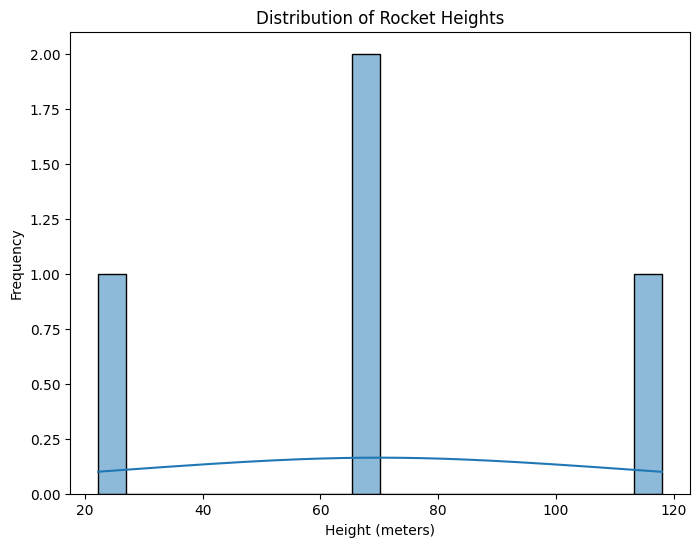

In [14]:
df_rockets['height_meters'] = df_rockets['height'].apply(lambda x: x['meters'] if 'meters' in x else None)

# Histogram of rocket heights in meters
plt.figure(figsize=(8, 6))
sns.histplot(df_rockets['height_meters'].dropna(), bins=20, kde=True)
plt.title('Distribution of Rocket Heights')
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')
plt.show()